### 타이타닉 생존자 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드
data = pd.read_excel('titanic.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
# 원하는 속성만 추출
df=data[['pclass','sex','age','sibsp','parch','fare','survived']]
df.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,1,female,29.0000,0,0,211.3375,1
1,1,male,0.9167,1,2,151.5500,1
2,1,female,2.0000,1,2,151.5500,0
3,1,male,30.0000,1,2,151.5500,0
4,1,female,25.0000,1,2,151.5500,0


In [4]:
# 널값 확인
df.isna().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
survived      0
dtype: int64

In [5]:
# 결측치 제거
df=df.dropna(axis=0)
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
survived    0
dtype: int64

In [6]:
# female, male -> 0, 1 (원-핫 인코딩)
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(df['sex'])
df['sex']=e.transform(df['sex'])
df.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,1,0,29.0000,0,0,211.3375,1
1,1,1,0.9167,1,2,151.5500,1
2,1,0,2.0000,1,2,151.5500,0
3,1,1,30.0000,1,2,151.5500,0
4,1,0,25.0000,1,2,151.5500,0


In [7]:
# 데이터프레임 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1045 non-null   int64  
 1   sex       1045 non-null   int32  
 2   age       1045 non-null   float64
 3   sibsp     1045 non-null   int64  
 4   parch     1045 non-null   int64  
 5   fare      1045 non-null   float64
 6   survived  1045 non-null   int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 61.2 KB


In [8]:
# 독립변수 종속변수 분리
X=df.iloc[:,0:6].values
y=df.iloc[:,6].values

In [9]:
# 데이터 5개만 확인
X[:5],y[:5]

(array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375],
        [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ],
        [  1.    ,   0.    ,   2.    ,   1.    ,   2.    , 151.55  ],
        [  1.    ,   1.    ,  30.    ,   1.    ,   2.    , 151.55  ],
        [  1.    ,   0.    ,  25.    ,   1.    ,   2.    , 151.55  ]]),
 array([1, 1, 0, 0, 0], dtype=int64))

In [10]:
# 훈련데이터 x,y(0.8)  테스트데이터 x,y(0.2) 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
# 학습 모델 생성 (sigmoid - binary_crossentropy)
model=Sequential()
model.add(Dense(255, input_dim=6, activation='relu'))  #input
model.add(Dense(1, activation='sigmoid'))  #output
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 체크포인트 저장
# 모델 저장의 조건을 설정합니다.
modelpath="./titanic/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 고친 코드
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpointer])

# 기존 코드
# hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)


Epoch 1/300
 1/27 [>.............................] - ETA: 8s - loss: 1.8449 - accuracy: 0.2500
Epoch 1: saving model to ./titanic\01-0.6986.hdf5
27/27 [==============================] - 1s 9ms/step - loss: 0.8327 - accuracy: 0.5706 - val_loss: 0.6041 - val_accuracy: 0.6986
Epoch 2/300
23/27 [========================>.....] - ETA: 0s - loss: 0.6361 - accuracy: 0.6658
Epoch 2: saving model to ./titanic\02-0.6842.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 0.6399 - accuracy: 0.6722 - val_loss: 0.6018 - val_accuracy: 0.6842
Epoch 3/300
 1/27 [>.............................] - ETA: 0s - loss: 0.5260 - accuracy: 0.8125
Epoch 3: saving model to ./titanic\03-0.7081.hdf5
27/27 [==============================] - 0s 4ms/step - loss: 0.5887 - accuracy: 0.7045 - val_loss: 0.5782 - val_accuracy: 0.7081
Epoch 4/300
 1/27 [>.............................] - ETA: 0s - loss: 0.4924 - accuracy: 0.7500
Epoch 4: saving model to ./titanic\04-0.7081.hdf5
27/27 [==========================

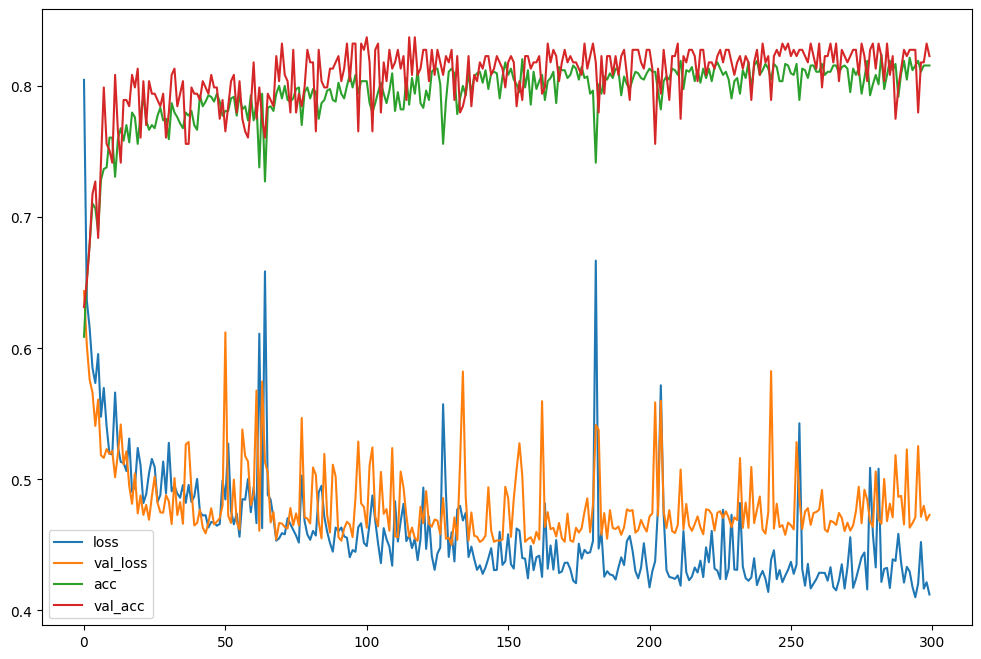

In [13]:
# 히스토리 확인
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [14]:
# 디카프리오, 윈슬렛 생존 확률 예측
dicaprio = np.array([3., 1., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 0., 17., 1., 2., 100.]).reshape(1,6)

print(model.predict(dicaprio))
print(model.predict(winslet))

1/1 [==============================] - 0s 86ms/step
[[0.15124595]]
1/1 [==============================] - 0s 22ms/step
[[0.9927934]]
